# __XGBoost__

In [1]:
# !conda install -c conda-forge xgboost # run only once to install xgboost
# pip install xgboost works better

^C


In [2]:
from xgboost import XGBClassifier

In [3]:
import pandas as pd

In [4]:
df = pd.read_csv('car_evaluation.csv')
df.head()

,buying,maint,doors,persons,lug_boot,safety,outcome
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc


In [11]:
for i in df:
    print(f'______{i}______ \r\n{df[i].value_counts()}')

______buying______ 
vhigh    432
low      432
high     432
med      432
Name: buying, dtype: int64
______maint______ 
vhigh    432
low      432
high     432
med      432
Name: maint, dtype: int64
______doors______ 
2    432
3    432
4    432
5    432
Name: doors, dtype: int64
______persons______ 
4    585
2    576
6    567
Name: persons, dtype: int64
______lug_boot______ 
med      576
big      576
small    576
Name: lug_boot, dtype: int64
______safety______ 
low     576
high    576
med     576
Name: safety, dtype: int64
______outcome______ 
unacc    1210
acc       384
good       69
vgood      65
Name: outcome, dtype: int64


In [12]:
df[df.outcome == 'unacc'].shape

(1210, 7)

In [13]:
X = df.iloc[:,:-1]
y = df.outcome

# One hot encoding

- Lets say we have a column gender that has 3 values M, F, O
- One hot encoding converts gender column into 3 columns
- wherever the data point is M the M column created by one hot encoder will be marked as 1 otherwise 0
- similar thing will happen for all the other two columns
- so our one column outputs 3 columns as it has 3 unique values which each output column containing 0 and 1 as data in it
- the problem here is that if we have n unique values in a column then OneHotEncoder will return n columns for that one column so if n is large your dataset will have multiple features added which can be defined in one feature
- for larger n (no of unique values in a column) it is better to use LabelEncoder
- an advantage here is that if we get n columns from onehot encoder and if we remove one column then the data will not be lost as we can deduce from the n-1 column for the values in n+1th column that was removed

In [14]:
from sklearn.preprocessing import OneHotEncoder

In [25]:
X_one_hot = pd.get_dummies(X, drop_first=True)

In [26]:
X_one_hot.head()

,doors,persons,buying_low,buying_med,buying_vhigh,maint_low,maint_med,maint_vhigh,lug_boot_med,lug_boot_small,safety_low,safety_med
0,2,2,0,0,1,0,0,1,0,1,1,0
1,2,2,0,0,1,0,0,1,0,1,0,1
2,2,2,0,0,1,0,0,1,0,1,0,0
3,2,2,0,0,1,0,0,1,1,0,1,0
4,2,2,0,0,1,0,0,1,1,0,0,1


In [23]:
oe = OneHotEncoder()

X_1h = oe.fit_transform(X)

TypeError: fit() got an unexpected keyword argument 'sparse'

In [24]:
print(X_1h)

  (0, 3)	1.0
  (0, 7)	1.0
  (0, 8)	1.0
  (0, 12)	1.0
  (0, 17)	1.0
  (0, 19)	1.0
  (1, 3)	1.0
  (1, 7)	1.0
  (1, 8)	1.0
  (1, 12)	1.0
  (1, 17)	1.0
  (1, 20)	1.0
  (2, 3)	1.0
  (2, 7)	1.0
  (2, 8)	1.0
  (2, 12)	1.0
  (2, 17)	1.0
  (2, 18)	1.0
  (3, 3)	1.0
  (3, 7)	1.0
  (3, 8)	1.0
  (3, 12)	1.0
  (3, 16)	1.0
  (3, 19)	1.0
  (4, 3)	1.0
  :	:
  (1723, 20)	1.0
  (1724, 1)	1.0
  (1724, 5)	1.0
  (1724, 11)	1.0
  (1724, 14)	1.0
  (1724, 16)	1.0
  (1724, 18)	1.0
  (1725, 1)	1.0
  (1725, 5)	1.0
  (1725, 11)	1.0
  (1725, 14)	1.0
  (1725, 15)	1.0
  (1725, 19)	1.0
  (1726, 1)	1.0
  (1726, 5)	1.0
  (1726, 11)	1.0
  (1726, 14)	1.0
  (1726, 15)	1.0
  (1726, 20)	1.0
  (1727, 1)	1.0
  (1727, 5)	1.0
  (1727, 11)	1.0
  (1727, 14)	1.0
  (1727, 15)	1.0
  (1727, 18)	1.0


In [27]:
X_one_hot.shape

(1728, 12)

In [28]:
# To remove nth column and keep n-1 columns to reduce number of features we can either use the drop method of pandas or
# pd.get_dummies(X, drop_first=True) is a shorter path

In [30]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_one_hot,y, test_size=0.2, random_state=7)

In [40]:
model = XGBClassifier(
    random_state=47,
    max_depth=5,
    n_estimators=150
)

model.fit(X_train, y_train)

y_predict_test = model.predict(X_test)
y_predict_train = model.predict(X_train)

C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[04:20:28] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


In [34]:
from sklearn.metrics import accuracy_score, classification_report

In [41]:
print('train: ', accuracy_score(y_train, y_predict_train))
print('test: ', accuracy_score(y_test, y_predict_test))

train:  1.0
test:  0.9971098265895953


In [42]:
print(classification_report(y_test, y_predict_test))

              precision    recall  f1-score   support

         acc       1.00      1.00      1.00        77
        good       0.89      1.00      0.94         8
       unacc       1.00      1.00      1.00       246
       vgood       1.00      0.93      0.97        15

    accuracy                           1.00       346
   macro avg       0.97      0.98      0.98       346
weighted avg       1.00      1.00      1.00       346



In [37]:
import seaborn as sns

<AxesSubplot:xlabel='col_0', ylabel='outcome'>

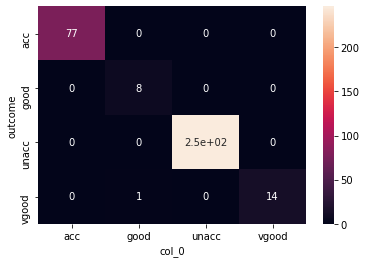

In [43]:
sns.heatmap(pd.crosstab(y_test, y_predict_test), annot=True)